In [ ]:
from __future__ import print_function
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.python.client import device_lib
from keras.callbacks import EarlyStopping
print(device_lib.list_local_devices())
%matplotlib inline

In [ ]:
## Loading dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
## Reshaping datasets
num_pixels = x_train.shape[1]*x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels)/255
x_test = x_test.reshape(x_test.shape[0], num_pixels)/255

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
## Defining Architechture
model = Sequential()
### 1st Layer
model.add(Dense(256, input_dim=784))
model.add(Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128,))
model.add(Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.3))

### 2nd Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# model = Sequential([Dense(50, input_shape=(28,28)),Activation('relu'), Dense(10),Activation('softmax'),])

In [5]:
## Compiling model
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'],)
model.summary()

In [6]:
## Training the model
training_log = model.fit(x=x_train, y=y_train, validation_split=0.05, batch_size=30, epochs=10,)

Train on 57000 samples, validate on 3000 samples
Epoch 1/10
57000/57000 [==============================] - 12s 210us/step - loss: 0.3429 - accuracy: 0.8956 - val_loss: 0.1064 - val_accuracy: 0.9703
Epoch 2/10
57000/57000 [==============================] - 11s 190us/step - loss: 0.1972 - accuracy: 0.9401 - val_loss: 0.0781 - val_accuracy: 0.9767
Epoch 3/10
57000/57000 [==============================] - 11s 190us/step - loss: 0.1624 - accuracy: 0.9493 - val_loss: 0.0717 - val_accuracy: 0.9813
Epoch 4/10
57000/57000 [==============================] - 11s 194us/step - loss: 0.1424 - accuracy: 0.9574 - val_loss: 0.0693 - val_accuracy: 0.9817
Epoch 5/10
57000/57000 [==============================] - 11s 198us/step - loss: 0.1286 - accuracy: 0.9600 - val_loss: 0.0676 - val_accuracy: 0.9803
Epoch 6/10
57000/57000 [==============================] - 12s 210us/step - loss: 0.1180 - accuracy: 0.9634 - val_loss: 0.0587 - val_accuracy: 0.9853
Epoch 7/10
57000/57000 [==============================] -

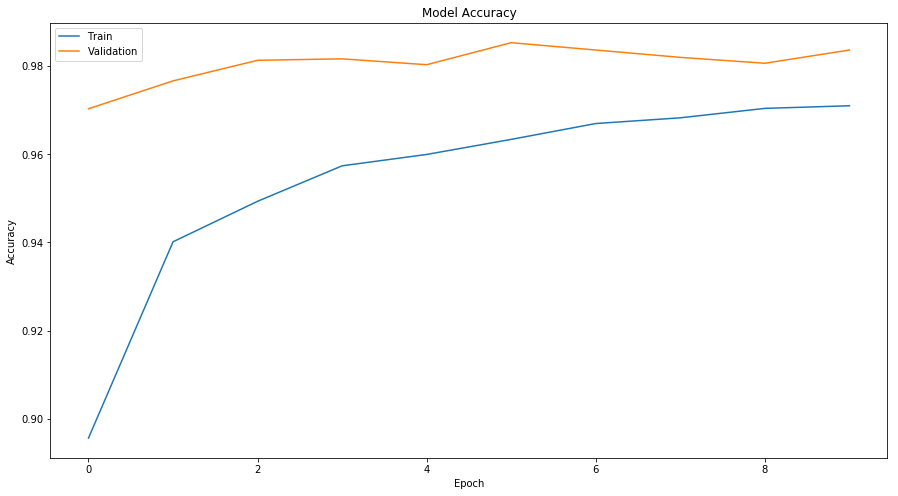

In [7]:
plt.figure(figsize=(15,8))
plt.plot(training_log.history['accuracy'])
plt.plot(training_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [8]:
model.predict_classes(x_test)[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

## Boston Dataset

In [9]:
from sklearn.preprocessing import StandardScaler
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [10]:
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x_train_df = pd.DataFrame(x_train, columns=col_name)
x_test_df = pd.DataFrame(x_test, columns=col_name)

In [11]:
scaler = StandardScaler()
scaler.fit(x_train_df)

## Applying scaling on Train and Test
x_train_scaled = scaler.transform(x_train_df)
x_test_scaled= scaler.transform(x_test_df)

In [12]:
## Defining Layers
model = Sequential()

### 1st Layer
model.add(Dense(64, input_dim=13))
model.add(Activation('relu'))
# model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.3))

### 2nd Layer
model.add(Dense(64,))
model.add(Activation('relu'))
# model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.3))

## Output Layer
model.add(Dense(1))

# model = Sequential([Dense(50, input_shape=(28,28)),Activation('relu'), Dense(10),Activation('softmax'),])

In [13]:
## Compiling model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy', 'mean_absolute_error'],)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                896       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [14]:
## Early stopping Initiation
es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=20)

In [15]:
## Training the model
training_log = model.fit(x=x_train_scaled, y=y_train, batch_size=25, epochs=200,callbacks=[es])

Epoch 1/200
404/404 [==============================] - 0s 612us/step - loss: 556.6939 - accuracy: 0.0000e+00 - mean_absolute_error: 21.7873
Epoch 2/200
404/404 [==============================] - 0s 272us/step - loss: 492.3539 - accuracy: 0.0000e+00 - mean_absolute_error: 20.2642
Epoch 3/200
404/404 [==============================] - 0s 183us/step - loss: 393.3120 - accuracy: 0.0025 - mean_absolute_error: 17.8257
Epoch 4/200
404/404 [==============================] - 0s 185us/step - loss: 262.5531 - accuracy: 0.0025 - mean_absolute_error: 14.0121
Epoch 5/200
404/404 [==============================] - 0s 188us/step - loss: 142.6661 - accuracy: 0.0025 - mean_absolute_error: 9.6920
Epoch 6/200
404/404 [==============================] - 0s 185us/step - loss: 81.4581 - accuracy: 0.0050 - mean_absolute_error: 6.8857
Epoch 7/200
404/404 [==============================] - 0s 183us/step - loss: 58.5273 - accuracy: 0.0074 - mean_absolute_error: 5.8265
Epoch 8/200
404/404 [========================

## Hyperparameter searhc to get the best params

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=64, step=32),
                           input_dim=13,
                           activation='relu'))
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=64, step=32),
                           activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory=r'D:\Columbia_University\MS AI\Lecture 2\Tuning',)

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(x_train_scaled, y_train,
             epochs=5,
             validation_data=(x_test_scaled, y_test))

In [ ]:
tuner.results_summary()